In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10) ## Set the default figure size for Matplotlib to (20, 10)
import seaborn as sns # Import the Seaborn library for statistical data visualization



In [5]:
d1 = pd.read_csv("C://Users//ADMIN//OneDrive//Desktop//projects//PYTHON_PROJECTS//bengaluru_pricing//bengaluru_house_prices.csv")
d1.head() #shows results of first 5 values in the csv

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
d1.shape # This provides the number of rows and columns in the DataFrame

(13320, 9)

In [7]:
d1.groupby('area_type')['area_type'].agg('count') # group by area_type count the occurrences of each unique 'area_type'

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
d2 = d1.drop(['area_type','society','balcony','availability'],axis ='columns') #drop columns that are not relevant in predicting the price
d2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
d2.isnull().sum() #Check the number of missing values (null or NaN) in each column of the DataFrame d2

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [77]:
mode =d2['size'].mode()# Finding the mode (most frequently occurring value) of the 'size' column in the DataFrame d2 which was :- 2BHK
mode_bath = d2['bath'].mode()# Finding the mode (most frequently occurring value) of the 'bath' column in the DataFrame d2 which was :- 2BHK

d2['size'].fillna("2 BHK",inplace =True) # Fill missing values in the 'size' column of DataFrame d2 with the value "2 BHK"
d2['bath'].fillna("2",inplace = True)# Fill missing values in the 'bath' column of DataFrame d2 with the value "2 "

0    2.0
Name: bath, dtype: object


In [11]:
d2.isnull().sum()#Check the number of missing values (null or NaN) in each column of the DataFrame d2

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
d3 = d2.dropna() # dropping any missing values from d2
d3.isnull().sum()
d3.shape

(13319, 5)

In [78]:
# Iterate through columns in the DataFrame d3
for col in d3.columns:
    if d3[col].dtype == "object": ## Check if the data type of the column is "object" (typically string or categorical)
        print()
        print(col)# Print the column name
        print(d3[col].unique())# Print the unique values in the column



location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']

size
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']

total_sqft
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']

bath
[2.0 5.0 3.0 4.0 6.0 1.0 9.0 '2' 8.0 7.0 11.0 10.0 14.0 27.0 12.0 16.0
 40.0 15.0 13.0 18.0]


In [14]:
d3['BHK'] = d3['size'].apply(lambda x : int(x.split(' ')[0])) # Extract the number of bedrooms (BHK) from the 'size' column and convert it to an integer

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16812\3651117621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['BHK'] = d3['size'].apply(lambda x : int(x.split(' ')[0]))


In [15]:
d3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
d3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
d3[d3.BHK > 20] # Filter rows in the DataFrame d3 where the 'BHK' (number of bedrooms) is greater than 20

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
d3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:          # If an exception (ValueError) occurs during conversion, return False
        float(x)
    except:
        return False # If conversion is successful, return True
    return True

In [20]:
# Filter rows in  d3 where the 'total_sqft' column contains ranges that cannot be converted to float

d3[~d3['total_sqft'].apply(is_float)]



,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [79]:
# Define a function 'convert_sqft_to_num' to convert  values in range to numeric values
def convert_sqft_to_num(x):
   
    tokens = x.split('-')  # Split the 'total_sqft' value using '-' to handle ranges
    

    if len(tokens) == 2:# Check if there are two tokens (indicating a range)
           return float(tokens[0]) + float(tokens[1]) / 2  # Convert the range to a numeric value (average of the range)
    try:
        return float(x) # Try to convert the 'total_sqft' value to a float
    except ValueError:
        return None# If an exception (ValueError) occurs during conversion, return None

   

In [82]:
convert_sqft_to_num('2100')

2100.0

In [83]:
convert_sqft_to_num('2100-3300')

3750.0

In [84]:
convert_sqft_to_num('34.465Sq. Meter')

In [25]:
d4 = d3.copy()
d4['total_sqft']=d4['total_sqft'].apply(convert_sqft_to_num) #now applying above function to the dataframe
d4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [85]:
d4.loc[30:]  #returns the value of the 30th data 

location      Yelahanka
size              4 BHK
total_sqft       3525.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [27]:
d4.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [86]:
d5 = d4.copy()
# Calculate the 'price_per_sqft' column  by dividing the 'price' column by the 'total_sqft' column
d5['price_per_sqft']= d5['price']*100000/d5['total_sqft'].round(2) 

In [29]:
print(d5)

                       location       size  total_sqft bath   price  BHK  \
0      Electronic City Phase II      2 BHK      1056.0  2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0  5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0  2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0  3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0  2.0   51.00    2   
...                         ...        ...         ...  ...     ...  ...   
13315                Whitefield  5 Bedroom      3453.0  4.0  231.00    5   
13316             Richards Town      4 BHK      3600.0  5.0  400.00    4   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0  2.0   60.00    2   
13318           Padmanabhanagar      4 BHK      4689.0  4.0  488.00    4   
13319              Doddathoguru      1 BHK       550.0  1.0   17.00    1   

       price_per_sqft  
0         3699.810606  
1         4615.384615  
2         4305.

In [30]:
len(d5.location.unique()) # This provides the count of unique locations in the dataset

1305

In [31]:

# Remove leading and trailing whitespaces from each value in the 'location' column of  d5
d5.location = d5.location.apply(lambda x : x.strip())
# Group the DataFrame d5 by 'location' and count the occurrences of each unique 'location'
location_stats = d5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [32]:
len(location_stats[location_stats <= 10]) # Find the number of unique locations with less than or equal to 10 occurrences in the dataset

1053

In [33]:

# Filter locations with less than or equal to 10 occurrences from the location_stats Series
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [34]:
len(d5.location.unique())#find number of such incidences where locality has less that 10 datas

1294

In [35]:

# Replace locations with less than or equal to 10 occurrences with 'other' in the 'location' column of  d5
d5.location = d5.location.apply( lambda x: 'other' if x in location_stats_less_than_10 else x)

In [36]:
len(d5.location.unique()) # This provides the count of unique locations in the dataset

242

In [37]:
d5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [38]:
# Filter rows in DataFrame d5 where the ratio of 'total_sqft' to 'BHK' is less than 300
# This is to identify potential outliers or incorrect data points
d5[d5.total_sqft/d5.BHK<300].head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [39]:
d5.shape

(13319, 7)

In [40]:
# Create a new DataFrame d6 by excluding rows where the ratio of 'total_sqft' to 'BHK' is less than 300
d6 = d5[~(d5.total_sqft/d5.BHK<300)] 
d6.shape

(12575, 7)

In [41]:
d6.price_per_sqft.describe()# Generate descriptive statistics of the 'price_per_sqft' column in the DataFrame d6

count     12529.000000
mean       6278.364833
std        4171.212462
min         267.829813
25%        4177.777778
50%        5273.250240
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
for key , subdf in d1.groupby('location'):# Iterate through groups in the DataFrame d1 grouped by the 'location' column
    print(key)

 Anekal
 Banaswadi
 Basavangudi
 Bhoganhalli
 Devarabeesana Halli
 Devarachikkanahalli
 Electronic City
 Mysore Highway
 Rachenahalli
 Sector 1 HSR Layout
 Thanisandra
 Whitefield
 ittamadu
 south
1 Annasandrapalya
1 Giri Nagar
1 Immadihalli
1 Ramamurthy Nagar
12th cross srinivas nagar banshankari 3rd stage
1A Block Koramangala
1Channasandra
1Hanuman Nagar
1Hoysalanagar
1Kasavanhalli
1st Block BEL Layout
1st Block HBR Layout
1st Block HRBR Layout
1st Block Jayanagar
1st Block Koramangala
1st Phase JP Nagar
1st Stage Domlur
1st Stage Indira Nagar
1st Stage Radha Krishna Layout
2 Bedroom Furnished Farm House in Kolar Road
2Electronic City Phase II
2nd Block Bel Layout
2nd Block Hbr Layout
2nd Block Hrbr Layout
2nd Block Jayanagar
2nd Block Koramangala
2nd Phase JP Nagar
2nd Phase Judicial Layout
2nd Stage Arekere Mico Layout
2nd Stage Nagarbhavi
2nd phase jp nagar, jp nagar
3rd Block Banashankari
3rd Block HBR Layout
3rd Block Hrbr Layout
3rd Block Jayanagar
3rd Block Koramangala
3rd Pha

out

In [43]:

# Define a function to remove outliers from a DataFrame based on 'price_per_sqft' for each 'location'
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        # Filter the current location group to exclude outliers based on mean and standard deviation
        reduced_df= subdf[(subdf.price_per_sqft >(m-std)) & (subdf.price_per_sqft <(m+std))]
        # Concatenate the filtered data for the current location group to the result DataFrame
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [44]:
#Apply the remove_pps_outlier function to the DataFrame d6 to filter out outliers

d7 = remove_pps_outlier(d6)
d7

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10281,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10282,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10283,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10284,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


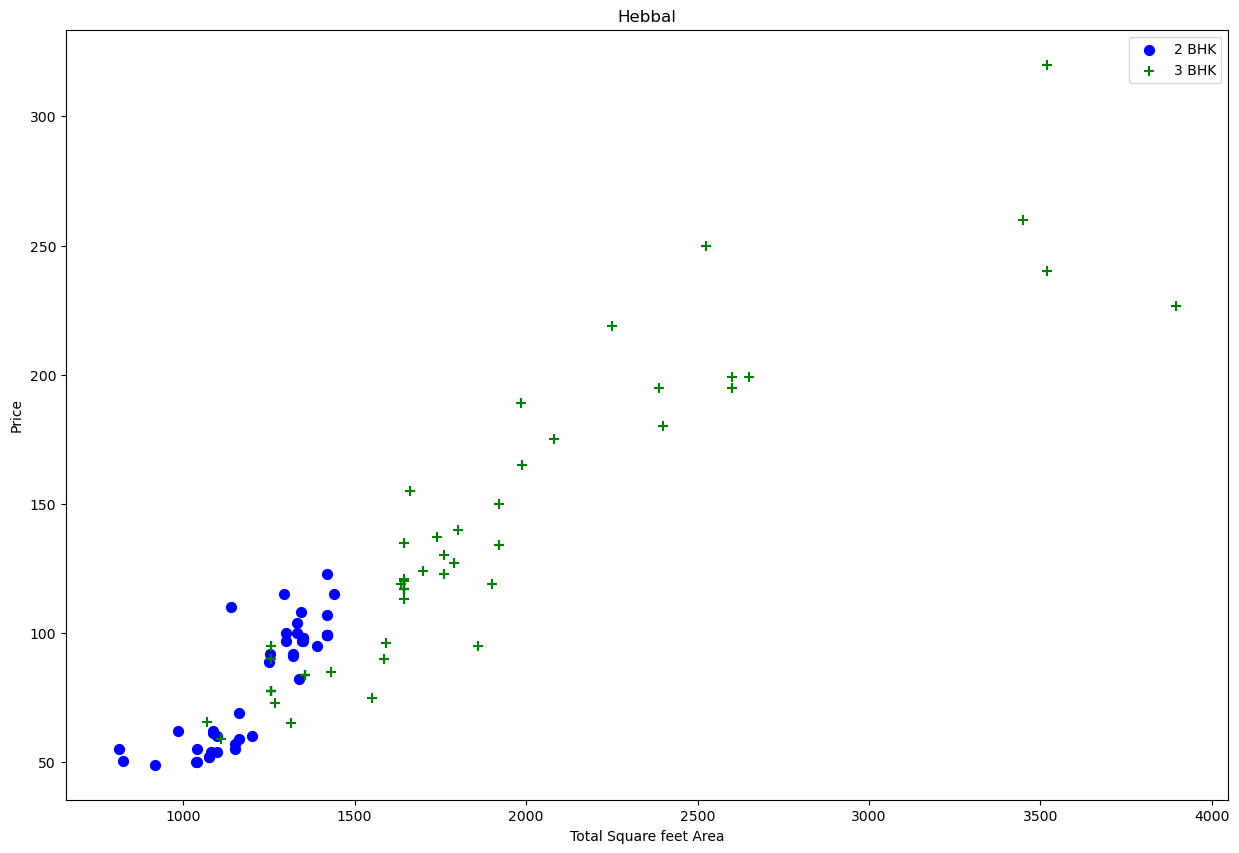

In [87]:
# Define a function to plot a scatter chart for 2 BHK and 3 BHK properties in a specific location

def plot_scatter_chart(df,location):
    # Filter DataFrame for 2 BHK and 3 BHK properties in the specified location
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label = '3 BHK', s=50)
     # Set labels and title for the plot
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(d7,"Hebbal")

    

#outlier removal function

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in d1.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft'],
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('BHK'):
                stats=bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')

In [46]:
import numpy as np

# Define a function to remove outliers from a DataFrame based on 'price_per_sqft' for each 'location' and 'BHK' group
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis=0)




In [47]:
d8 = remove_bhk_outliers(d7)

In [48]:
d8.shape

(7357, 7)

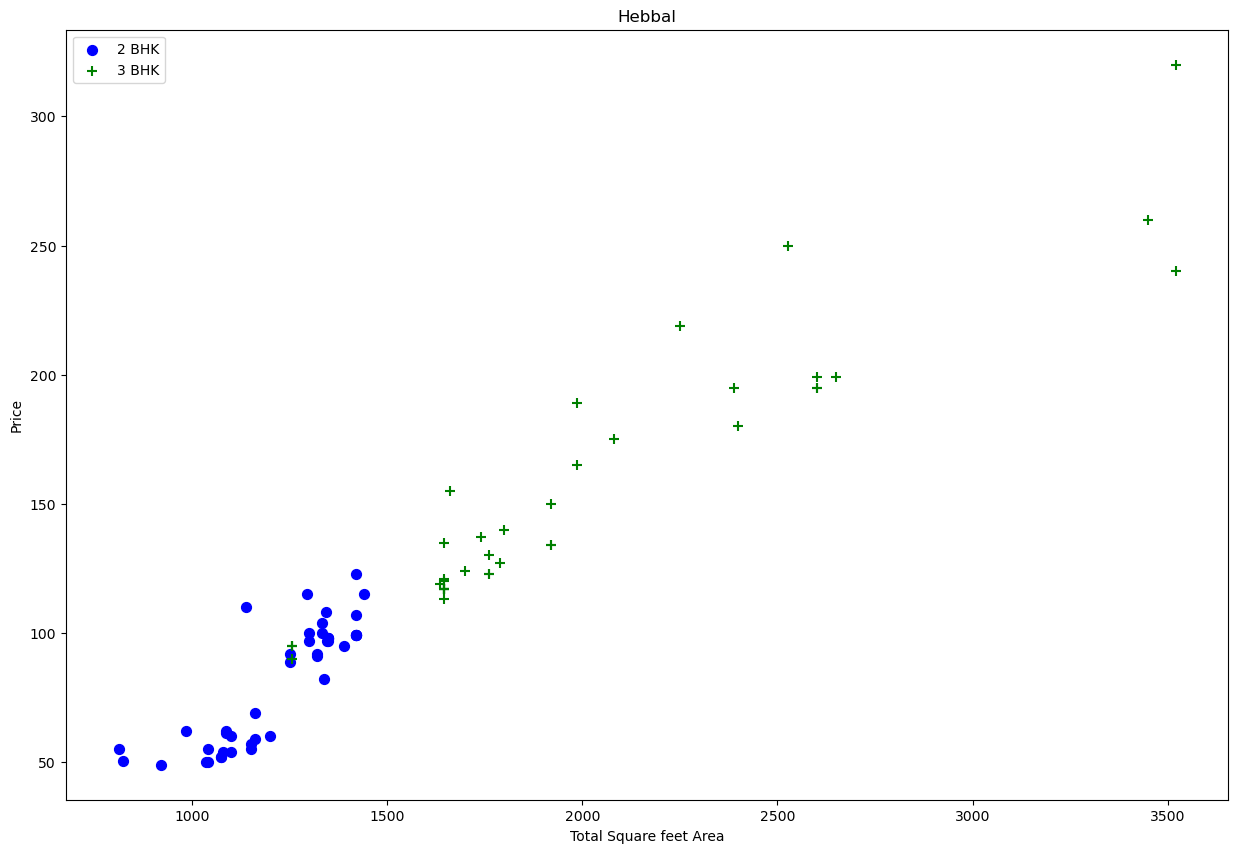

In [49]:
plot_scatter_chart(d8,"Hebbal")

Text(0, 0.5, 'count')

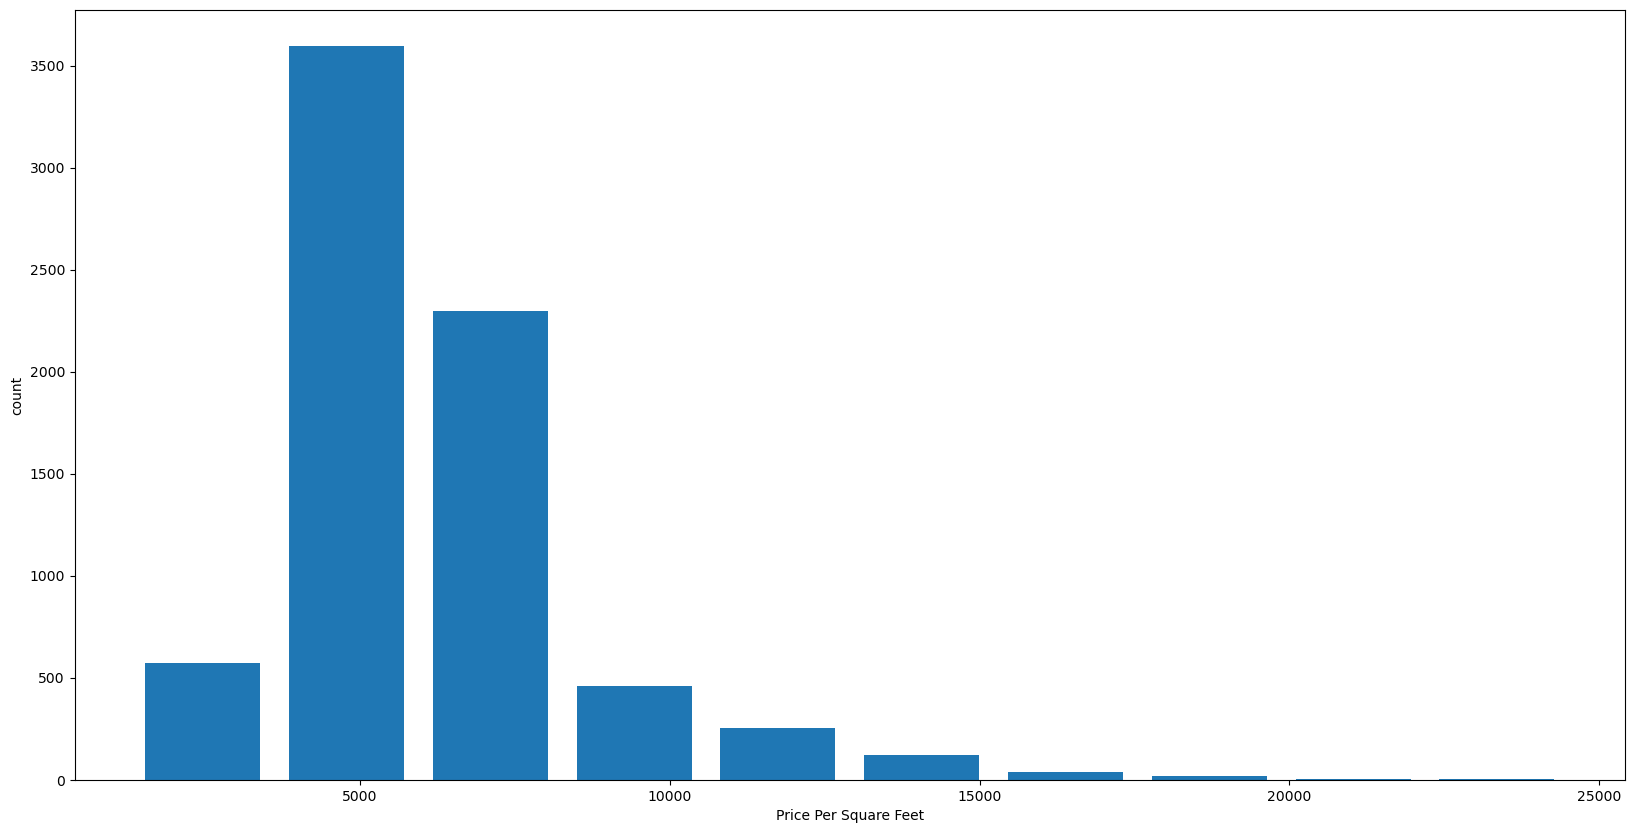

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(d8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

In [51]:
d8.bath.unique() #bathroom no > bedroom +2 will be an outlier

array([4.0, 3.0, 2.0, 5.0, 8.0, 1.0, 6.0, '2', 7.0, 9.0, 12.0, 16.0, 13.0],
      dtype=object)

In [52]:

d8['bath'] = pd.to_numeric(d8['bath'], errors='coerce', downcast='integer')

Text(0, 0.5, 'count')

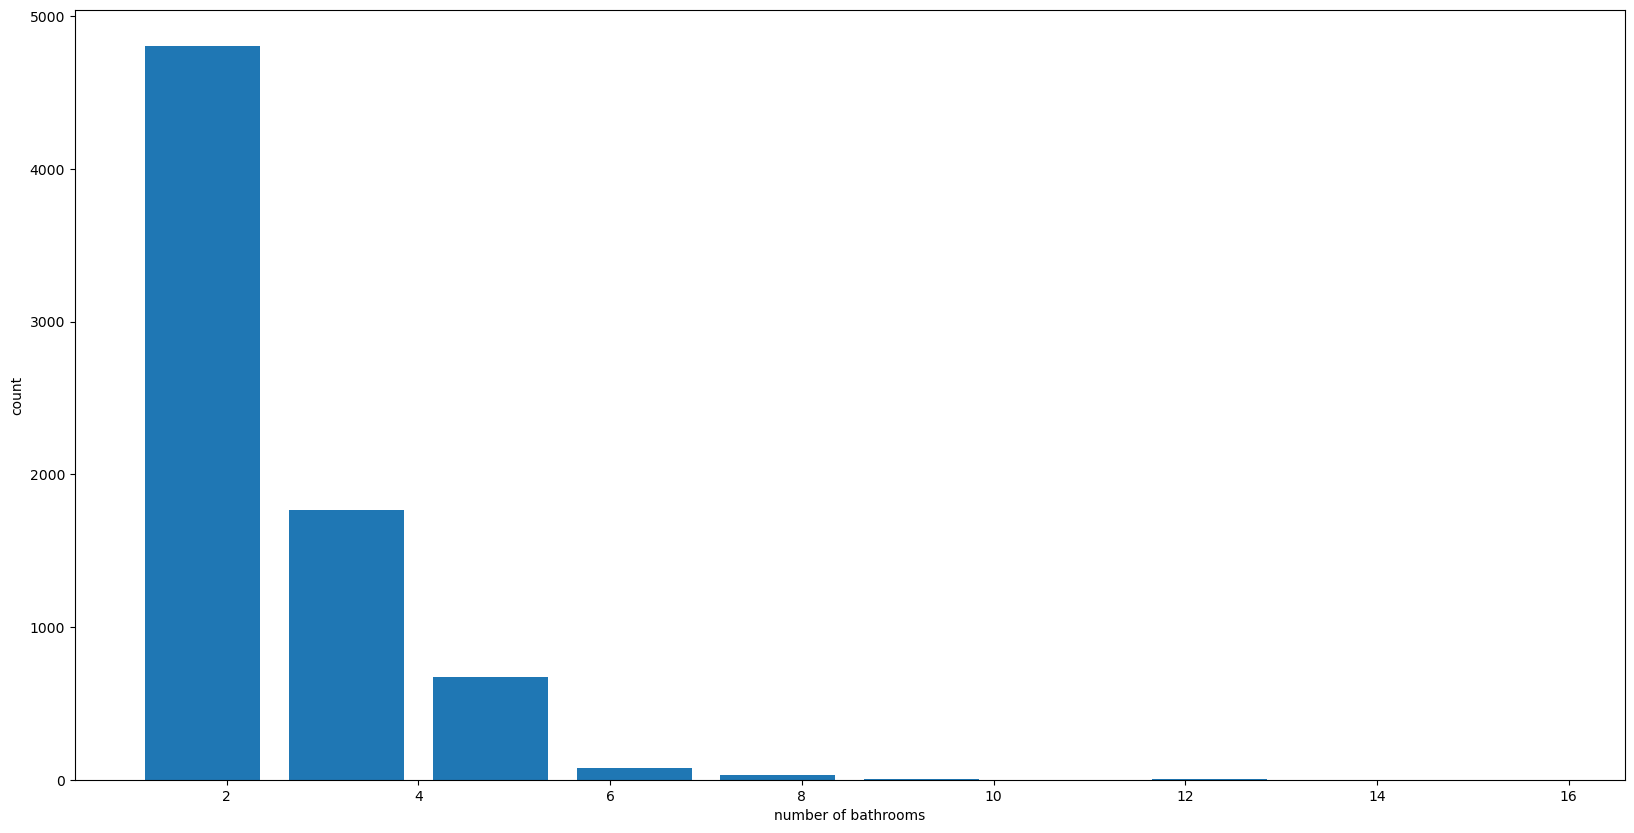

In [53]:
# Create a histogram for the 'price_per_sqft' column in the DataFrame d7

plt.hist(d8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [54]:

#condition is often used to identify outliers  where the number of bathrooms is significantly higher than the number of bedrooms.
d8[d8.bath > d8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1632,Chikkabanavar,4 Bedroom,2460.0,7,80.0,4,3252.032520
5269,Nagasandra,4 Bedroom,7000.0,8,450.0,4,6428.571429
6750,Thanisandra,3 BHK,1806.0,6,116.0,3,6423.034330
8453,other,6 BHK,11338.0,9,1000.0,6,8819.897689


In [55]:
# Create a new DataFrame d9 by excluding rows where the number of bathrooms is greater than the number of bedrooms plus 2

d9 = d8[d8.bath< d8.BHK+2]
d9.shape

(7282, 7)

# Machine Learning 

In [56]:
#drop unnecessary columns before using ml training 
d10 = d9.drop(['size','price_per_sqft'],axis='columns')
d10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3


In [57]:
#ml model cannot be trained for text values sc create dummy functions 

            total_sqft      bath     price       BHK
total_sqft    1.000000  0.681430  0.837694  0.664241
bath          0.681430  1.000000  0.596577  0.888898
price         0.837694  0.596577  1.000000  0.570213
BHK           0.664241  0.888898  0.570213  1.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16812\3043900938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = d10.corr()


<Axes: >

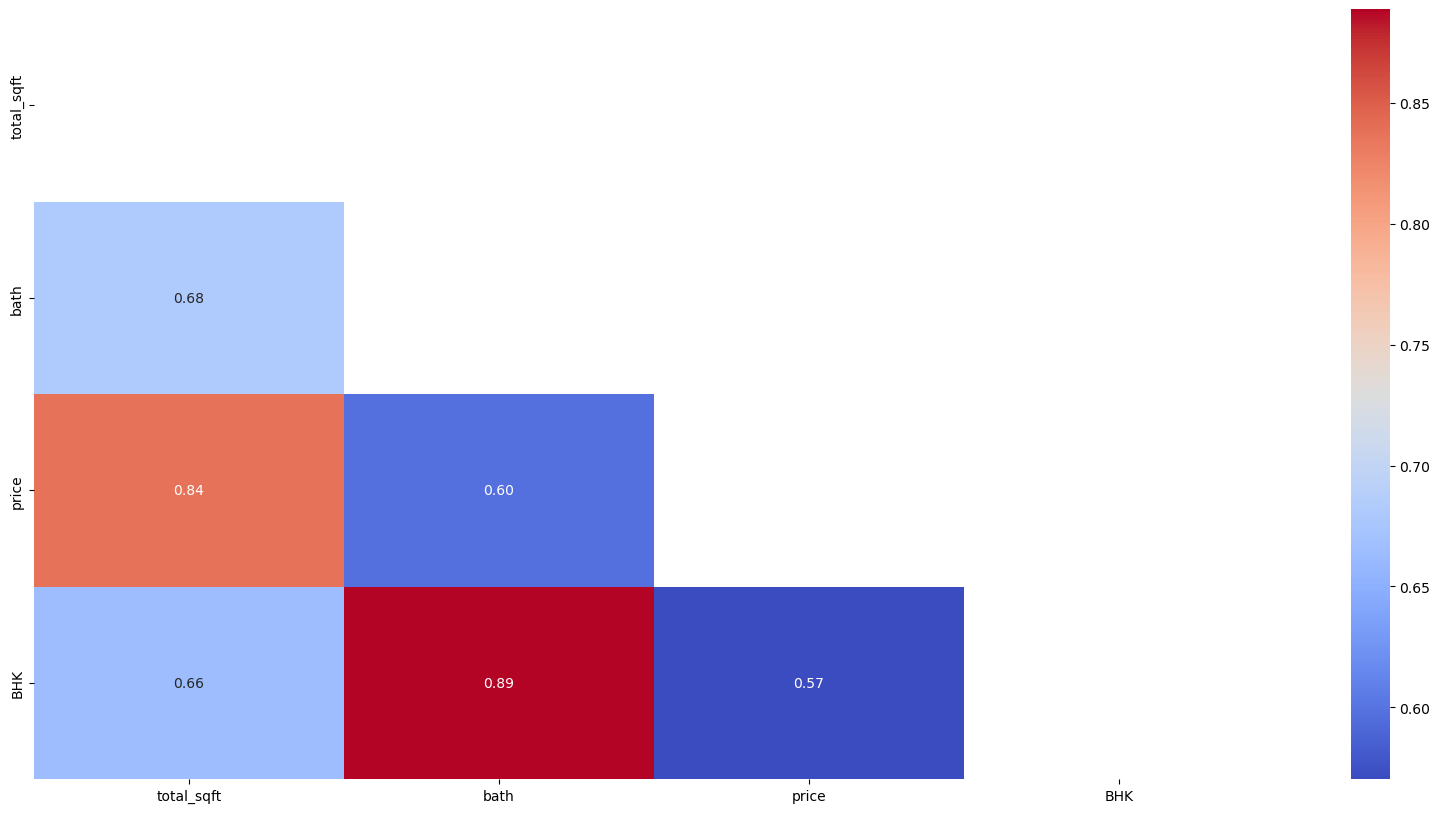

In [58]:

# Calculate the correlation matrix for the DataFrame d10
corr_matrix = d10.corr()
print(corr_matrix)
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))# Create a mask for the upper triangle of the correlation matrix
sns.heatmap(corr_matrix,annot= True,fmt =".2f",cmap="coolwarm",mask=mask)

In [59]:

#one hot encoding
# Create dummy variables for the 'location' column in the DataFrame d10
dumies = pd.get_dummies(d10.location)
dumies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Concatenate the DataFrame d10 with the dummy variables (excluding the 'other' dummy variable) along the columns
d11 = pd.concat([d10,dumies.drop('other',axis='columns')],axis='columns')
d11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
d12 = d11.drop('location',axis='columns')
d12.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
d12.shape

(7282, 245)

In [63]:
# creating a new DataFrame X that contains all the independent variables (features) for training a machine learning model. The purpose of this step is to separate the target variable (the variable we want to predict, in this case, 'price') from the features used to make predictions.

X = d12.drop('price',axis='columns')
X.head() 

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y= d12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [65]:
#Importing the Function: Import the train_test_split function from the sklearn.model_selection module. This function is commonly used for splitting datasets.
from sklearn.model_selection import train_test_split

# X contains the independent variables (features), and y contains the target variable
# X_train, X_test, y_train, and y_test will be used for training and testing the machine learning model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
                                            

In [66]:
#we are using scikit-learn to create a Linear Regression model, 
#fit it on the training data (X_train, y_train), and then evaluate its performance on the test data (X_test, y_test). 


from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

# Evaluate the model's performance on the test data and print the R-squared score
lr_clf.score(X_test,y_test)

0.789918277639534

In [67]:
 #WE are using scikit-learn's ShuffleSplit for cross-validation along with the cross_val_score function 
#to evaluate the performance of a Linear Regression model. 


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


# Create a ShuffleSplit cross-validator with 5 splits, 20% test size, and a random state
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state = 0)
# Use cross_val_score to perform cross-validation on a Linear Regression model
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82399783, 0.84455428, 0.85268464, 0.82808203, 0.8355389 ])

In [ ]:
# the below code iterates over different regression algorithms (linear regression, Lasso, decision tree),
#performs a grid search with cross-validation to find the best hyperparameters for each algorithm, and 
#then presents the results in a DataFrame showing the best model, its score, and the corresponding hyperparameters.
#This process helps in selecting the best-performing model with optimal hyperparameters for your regression task.

In [68]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression


def find_best_model_using_gridsearchcv(x, y):
    # Define a dictionary 'algos' with three regression algorithms, each with its hyperparameter grid
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
           'model': algo_name,
           'best_score': gs.best_score_,
            'best_params': gs.best_params_

    })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])



find_best_model_using_gridsearchcv(X, y)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.837393,{'fit_intercept': False}
1,lasso,0.680412,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.672163,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [69]:
#This function predict_price takes four parameters (location, sqft, bath, bhk) and 
#uses a trained linear regression model (lr_clf) to predict the price of a property based on these input features


# Find the index corresponding to the 'location' in the feature columns
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns== location)[0][0] # Create an array 'x' with zeros, where the length is the number of columns in the feature matrix (X)
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0: # Create an array 'x' with zeros, where the length is the number of columns in the feature matrix (X)
        x[loc_index] = 1
# Use the trained linear regression model to predict the price based on the input features 'x'        
    return lr_clf.predict([x])[0]

In [70]:
predict_price("Vijayanagar",1200,1,4)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.27373216520665

In [71]:
predict_price("Indira Nagar",1200,1,4)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


203.2646530622295

In [72]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.23522211013821